In [ ]:
  import warnings
  warnings.filterwarnings('ignore')

  import numpy as np
  import pandas as pd


  from sklearn.preprocessing import StandardScaler
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.preprocessing import RobustScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
my_path = '/content/drive/My Drive/day1.csv'
day1 = pd.read_csv(my_path)
day1.head()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


,Unnamed: 0,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,tot
0,1,1,2011-01-01,1,0,1,0,6,0,2,8.175849,7.999250,0.805833,10.749882,331,654,985
1,2,2,2011-01-02,1,0,1,0,0,0,2,9.083466,7.346774,0.696087,16.652113,131,670,801
2,3,3,2011-01-03,1,0,1,0,1,1,1,1.229108,-3.499270,0.437273,16.636703,120,1229,1349
3,4,4,2011-01-04,1,0,1,0,2,1,1,1.400000,-1.999948,0.590435,10.739832,108,1454,1562
4,5,5,2011-01-05,1,0,1,0,3,1,1,2.666979,-0.868180,0.436957,12.522300,82,1518,1600


In [ ]:
def kNN(X,Y,newx,k,regress=True,allK=False,leave1out=False,scaleX=True,scaler=StandardScaler()):

  import warnings
  warnings.filterwarnings('ignore')

  import numpy as np

  from sklearn.neighbors import KNeighborsClassifier 
  from sklearn.neighbors import KNeighborsRegressor

  from sklearn.preprocessing import StandardScaler
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.preprocessing import RobustScaler

  from statistics import mean 
  from statistics import mode
  from collections import Counter

  def kNNtype(neighbs,regress):
    if regress:
      knn = KNeighborsRegressor(n_neighbors=neighbs)
    else:
      knn = KNeighborsClassifier(n_neighbors=neighbs)
    return knn

  if scaler != StandardScaler():
    scaler=scaler


# Update: for row subsets/test sets in hw; fitting the scaling function should be done separate,
# so the same can be applied to train and test data (or X and newx) 
  if scaleX == True:
    # scale should be fit to X/train
    scaler.fit(X)
    newx = pd.DataFrame(scaler.transform(newx))
    X = pd.DataFrame(scaler.transform(X))
  

  knn_all = pd.DataFrame()
  if allK == True:
    if leave1out == True:
      nn_all = []
      for j in list(newx.index.values.tolist()): #(4/13)
      #for j in list(Y.index.values.tolist()): 
        knn_row = []
        knn = kNNtype(k+1,regress)
        knn.fit(X, Y)
        test = pd.DataFrame(newx.loc[j,:])
        nn = knn.kneighbors(test.T)[1][0]
        for i in range(2,k+1):
          nn1 = nn[1:i] # leave one out
          test = list(Y.iloc[nn1])
          if regress:
            test = mean(test)
          else:
            c = Counter(test)
            l = list(c.values())
            ind = l.index(max(c.values()))
            test = list(c.keys())[ind]
            # count number of times the max class occurs and if there is a tie
            # choose the second class with the max if index is even
            if (l.count(max(l))) > 1 and (j % 2 !=0):
              l[ind] = 0
              ind = l.index(max(c.values()))
              test = list(c.keys())[ind2]

          knn_row.append(test)
        knn_row = pd.DataFrame(knn_row)
        knn_all = [knn_all, knn_row]
        knn_all = pd.concat(knn_all,axis=1, ignore_index=True)
        nn_all.append(list(nn1))
      nn_all = np.array(nn_all)
    else:
        for i in range(1,k+1):
          knn = kNNtype(i,regress)
          knn.fit(X, Y)
          test = knn.predict(newx)
          knn_row = pd.DataFrame(test).T
          knn_all = [knn_all, knn_row]
          knn_all = pd.concat(knn_all,axis=0, ignore_index=True)
        nn_all = knn.kneighbors(newx)[1]
  else:
    if leave1out == True:
      knn_row = []
      #for j in list(Y.index.values.tolist()):
      for j in list(newx.index.values.tolist()): # (4/13)
        knn = kNNtype(k,regress)
        knn.fit(X, Y)
        test = pd.DataFrame(newx.loc[j,:])
        nn = knn.kneighbors(test.T)[1][0]
        nn1 = nn[1:len(nn)]

        test = list(Y.iloc[nn1])
        if regress:
            test = mean(test)
        else:
          c = Counter(test)
          l = list(c.values())
          ind = l.index(max(c.values()))
          test = list(c.keys())[ind]
          # count number of times the max class occurs and if there is a tie
          # choose the second class with the max if index is even
          if (l.count(max(l))) > 1 and (j % 2 !=0):
            l[ind] = 0
            ind = l.index(max(c.values()))
            test = list(c.keys())[ind2]

        knn_row.append(test)
      knn_all = pd.DataFrame(knn_row).T
      nn_all = nn1
    else:
        knn = kNNtype(k,regress)
        knn.fit(X, Y)
        test = knn.predict(newx)
        knn_all = pd.DataFrame(test)
        nn_all = knn.kneighbors(newx)[1]

  return knn_all, nn_all

# Question 3:
Read the example on Parametric Model Fit Assessment on the regtools documentation (markdown file on the Github page:  https://github.com/matloff/regtools). Make a parvsnonparplot for the Bike Sharing data. Include your code file and graph in your written report. What does this suggest about the linear model?


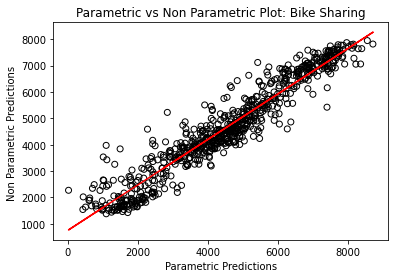

The Best Fit Line for the Graph:
Y = 0.8635X + 744.202


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


vars = day1.drop(['dteday'], axis = 1)  ### I dropped dteday because it was a string 
x_vars = vars.drop(['tot'], axis = 1)
y_var = vars.loc[:, 'tot']
lm = LinearRegression()
lm.fit(x_vars, y_var)
y_preds_lm = lm.predict(x_vars)

knnout, nn = kNN(x_vars,y_var,x_vars,10,regress=True,allK=False,leave1out=True)
list_knn_preds = knnout.to_numpy()

plt.scatter(y_preds_lm, list_knn_preds[0],  facecolors='none', edgecolors='k')  ## (X, Y) -> X = parametric, Y = nonparametric
m, b = np.polyfit(y_preds_lm, list_knn_preds[0], 1)
plt.plot(y_preds_lm, m*y_preds_lm + b, c = 'r')

plt.title("Parametric vs Non Parametric Plot: Bike Sharing")
plt.xlabel("Parametric Predictions")
plt.ylabel("Non Parametric Predictions ")
plt.show()

print("The Best Fit Line for the Graph:")
print("Y = 0.8635X + 744.202")
